In [13]:
def print_info_about_data(train_data,test_data,train_labels,test_labels):
    print("Number of training examples : " , train_data.shape[0])
    print("Number of testing examples : " , test_data.shape[0])
    print("Number of features : " , test_data.shape[1])
    print("Shape of training data : ", train_data.shape)
    print("Shape of testing data : ", test_data.shape)
    print("Shape of training labels : ", train_labels.shape)
    print("Shape of testing labels : ", test_labels.shape)

In [14]:
def one_hot_matrix(labels,nclasses = 10):
    res = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        res[i,int(l)] = 1
    return res  

In [15]:
def show_sample(train_data,train_labels,index_of_data):
    data = train_data[index_of_data]
    label = train_labels[index_of_data,:]
    transformed_data = np.reshape(data,[8,8]).astype(np.float32) 
    plt.figure(figsize=(1,1))
    plt.title('Input is %i'%np.argmax(label))
    plt.imshow(transformed_data,cmap='gray')
    plt.show()

In [16]:
def compute_accuracy(input_data,input_labels):
    correct_prediction = tf.equal(tf.argmax(yhat,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    return round(accuracy.eval(feed_dict = {x:input_data,y:input_labels})*100,2)

Number of training examples :  3823
Number of testing examples :  1797
Number of features :  64
Shape of training data :  (3823, 64)
Shape of testing data :  (1797, 64)
Shape of training labels :  (3823, 10)
Shape of testing labels :  (1797, 10)


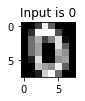

Iteration number :  0
Cost :  2.15237188339
Training accuracy : 74.84 Testing accuracy : 71.4
Iteration number :  50
Cost :  0.291012942791
Training accuracy : 94.56 Testing accuracy : 92.49
Iteration number :  100
Cost :  0.210722595453
Training accuracy : 96.1 Testing accuracy : 93.32
Iteration number :  150
Cost :  0.184872880578
Training accuracy : 96.65 Testing accuracy : 93.54
Iteration number :  200
Cost :  0.172374308109
Training accuracy : 96.86 Testing accuracy : 93.77
Iteration number :  250
Cost :  0.165393933654
Training accuracy : 96.97 Testing accuracy : 93.99
Iteration number :  300
Cost :  0.161157056689
Training accuracy : 97.15 Testing accuracy : 94.16
Iteration number :  350
Cost :  0.158442139626
Training accuracy : 97.17 Testing accuracy : 94.21
Iteration number :  400
Cost :  0.156639039516
Training accuracy : 97.28 Testing accuracy : 94.32
Iteration number :  450
Cost :  0.155413687229
Training accuracy : 97.28 Testing accuracy : 94.27
Iteration number :  500
Co

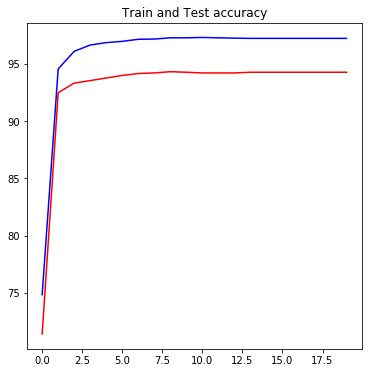

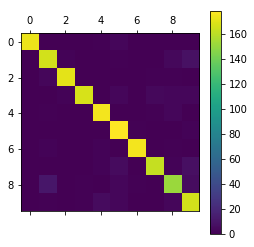

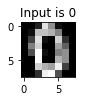

Output is:  0


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import csv

#LOAD INPUT
input_train = np.genfromtxt('optdigits.tra.txt', delimiter=',')
input_test = np.genfromtxt('optdigits.tes.txt', delimiter=',')

#PRE PROCESS INPUT
train_data,train_labels = input_train[:,0:input_train.shape[1]-1]/16,input_train[:,input_train.shape[1]-1]
test_data,test_labels = input_test[:,0:input_test.shape[1]-1]/16,input_test[:,input_test.shape[1]-1]     
processed_train_labels = one_hot_matrix(train_labels)
processed_test_labels = one_hot_matrix(test_labels)

#PRINT INFO ABOUT THE DATA
print_info_about_data(train_data,test_data,processed_train_labels,processed_test_labels)

#SHOW SAMPLE DATA
show_sample(train_data,processed_train_labels,np.random.randint(train_data.shape[0]))

#INITIALIZE VARIABLES AND PLACEHOLDERS
x = tf.placeholder("float", [None,64])
y = tf.placeholder("float", [None,10])
W = tf.Variable(tf.zeros([64,10]))
b = tf.Variable(tf.zeros([10]))
beta = 0.001

#LOGISTIC REGREGRESSION EQUATIONS
yhat = tf.matmul(x,W) + b
cross_entropy_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yhat,labels = y))
regularizer = tf.nn.l2_loss(W)
cost = tf.reduce_mean(cross_entropy_cost + beta * regularizer)
optimization_step = tf.train.AdamOptimizer(0.02).minimize(cost)
   
#CREATE SESSION AND INITIALIZE IT
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#RUN GRADIENT DESCENT
epochs = 1000
train_acc = np.zeros(epochs//50) #converts to the lowest integer
test_acc = np.zeros(epochs//50)
cost = np.zeros(epochs//50)
for i in range(epochs):   
    sess.run(optimization_step,feed_dict={ x: train_data,y: processed_train_labels})
    if (i%50 == 0):
        print("Iteration number : " , i)
        cost[i//50] = sess.run(cross_entropy_cost,feed_dict = {x: train_data,y: processed_train_labels})
        train_acc[i//50] = compute_accuracy(train_data,processed_train_labels)
        test_acc[i//50] = compute_accuracy(test_data,processed_test_labels)       
        print("Cost : " , cost[i//50])       
        print("Training accuracy :" ,train_acc[i//50],"Testing accuracy :" ,test_acc[i//50]) 
        
#PLOT COST, TRAINING AND TEST ACCURACY
# Plot the accuracy curves
plt.figure(figsize=(6,6))
plt.title("Train and Test accuracy")
plt.plot(train_acc,'b-')
plt.plot(test_acc,'r-')

# Plot the confusion matrix
pred = np.argmax(yhat.eval(feed_dict={x:test_data}), axis = 1)
confusion_matrix = np.zeros([10,10])
for p,t in zip(pred,np.argmax(processed_test_labels,axis=1)):
    confusion_matrix[t,p] += 1
plt.matshow(confusion_matrix)
plt.colorbar()
plt.show()

#TESTING WITH SAMPLE IMAGE
test_output_index = np.random.randint(test_data.shape[0])
show_sample(test_data,processed_test_labels,test_output_index)
print("Output is: ",np.argmax(sess.run(yhat,feed_dict={x:test_data[test_output_index:test_output_index+1,:]})))